<h1>Dinamita de datos</h1>
<h2>Análisis de datos</h2> 
<img src="ciclo.jpg" width=500 >
<p>Ciclo de análisis de datos propuestos por IBM</p>

<h2>Business Understanding</h2>
<p>Nuestro objetivo en este analisis sera:</p>
<b>Analizar la relación entre la percepción de seguridad, la incidencia de delitos y su impacto en el clima de negocios en Bogotá</b>



<h2>Analytic Approach</h2>



<h2>Data Requiriments</h2>
Leidy nos dice esto vvvvvvvvvvvvvvvvvvvvvvvvvvvvv

<h2>Data Preparation</h2>


<h3>Lectura de documentos donde estan los datos proporcionados</h3>

In [44]:
pip install seaborn pandas numpy openpyxl scipy scikit-learn

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 660.6 kB/s eta 0:00:17
   ---------------------------------------- 0.1/10.6 MB 1.4 MB/s eta 0:00:08
   - -------------------------------------- 0.4/10.6 MB 3.0 MB/s eta 0:00:04
   ---- ----------------------------------- 1.1/10.6 MB 6.1 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/10.6 MB 6.8 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/10.6 MB 7.9 MB/s eta 0:00:02
   -------- ------------------------------- 2.3/10.6 MB 7.6 MB/s eta 0:00:02
   --------- ------------------------------ 2.5/10.6 MB 7.2 MB/s eta 0:00:02
   ---------- ----------------------------- 2.7/10.6 MB 7.0 MB/s eta 0:00:02
   ----------- ---------------------------- 3.2/10.6 MB 7.2 MB/s eta 0:00:02
   ------------- -------------------------- 3.6/10.6 MB 7.8 MB/s eta 0:00:01
   -------------- ------------------------- 4.0/10.6 MB 7.9 MB/s eta 0:00:01
   -

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

<h4>datos del ECN

2020

In [3]:
ruta ="Bases de datos/1.4. Bases CCB/ECN/2020/Base_2020.csv"
listaColumnasECN = ['id_base',
                    'p_p64_p64', 
                    'p_p65_p65', 
                    'p_p66_p66', 
                    'p_p67_p67_1', 'p_p67_p67_2', 'p_p67_p67_3','p_p67_p67_4', 'p_p67_p67_5' , 'p_p67_p67_6', 'p_p68_p68',
                    #hurto,        delitosinfo,    fraude,       extorsion,      ESTAFA,      hurto auto,    denuncio
                    'p_p69_p69_1', 'p_p69_p69_2', 'p_p69_p69_3',         'p_p69_p69_4',        'p_p69_p69_5',
                    #Aplicación,  Casa de Justicia,nspección de policía   URI de la Fiscalía    GAULA
                    'fexp']

ECN2020 = pd.read_csv(ruta,encoding='iso-8859-1')
ECN2020 = ECN2020.loc[:, listaColumnasECN]
ECN2020.head(20)

C:\Users\USER\AppData\Local\Temp\ipykernel_8796\2554173627.py:12: DtypeWarning: Columns (36,48,207,345,444) have mixed types. Specify dtype option on import or set low_memory=False.
  ECN2020 = pd.read_csv(ruta,encoding='iso-8859-1')


,id_base,p_p64_p64,p_p65_p65,p_p66_p66,p_p67_p67_1,p_p67_p67_2,p_p67_p67_3,p_p67_p67_4,p_p67_p67_5,p_p67_p67_6,p_p68_p68,p_p69_p69_1,p_p69_p69_2,p_p69_p69_3,p_p69_p69_4,p_p69_p69_5,fexp
0,bog_1,3,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.625954
1,bog_2,3,3.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.625954
2,bog_3,2,2.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.625954
3,bog_4,2,2.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.625954
4,bog_5,2,3.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.625954
5,bog_6,2,2.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.625954
6,bog_7,2,3.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.625954
7,bog_8,1,2.0,1,1.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,15.625954
8,bog_9,3,2.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.625954
9,bog_10,3,2.0,1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,15.625954


2021

In [4]:
ruta ="Bases de datos/1.4. Bases CCB/ECN/2021/Base_2021.csv"
ruta2 ="Bases de datos/1.4. Bases CCB/ECN/2021/Base_2021(Antiguo).xlsx"
listaColumnasECN = ['P54',
                    'P55',
                    'P56',
                    'P57A','P57B',      'P57C', 'P57D',   'P57E',       'P57F',  'P57G',     'P57H',    'P58', 
                    #hurto,delitosinfo, fraude, extorsion, hurto auto, ataque,  vandalsimo, secuestro, denuncio
                    'P59',
                    #1	APLICACIÓN A DENUNCIAR, 
                    # 2	CASA DE JUSTICIA (COMISARÍA DE FAMILIA)
                    #3	INSPECCIÓN DE POLICÍA (ESTACIÓN DE POLICÍA)
                    #4	URI DE LA FISCALÍA
                    #5	GAULA
                    ]
listaColumnasECNANT =['P54',
                    'P55',
                    'P56',
                    'P57A','P57B',      'P57C', 'P57D',   'P57E',       'P57F',  'P57G',     'P57H',    'P58', 
                    #hurto,delitosinfo, fraude, extorsion, hurto auto, ataque,  vandalsimo, secuestro, denuncio
                    'P59',
                    #1	APLICACIÓN A DENUNCIAR, 
                    # 2	CASA DE JUSTICIA (COMISARÍA DE FAMILIA)
                    #3	INSPECCIÓN DE POLICÍA (ESTACIÓN DE POLICÍA)
                    #4	URI DE LA FISCALÍA
                    #5	GAULA
                    'fax expansión'
                    ]
ECN2021 = pd.read_csv(ruta,encoding='iso-8859-1')
ECN2021ANT = pd.read_excel(ruta2)

ECN2021ANT = ECN2021ANT.loc[:, listaColumnasECNANT]
ECN2021ANT

ParserError: Error tokenizing data. C error: Expected 2 fields in line 2026, saw 4


2022

In [14]:
ruta ="Bases de datos/1.4. Bases CCB/ECN/2022/Base_2022.csv"
listaColumnasECN = ['P56',
                    'P57',
                    'P58', 
                    'P59.1', 'P59.2',  'P59.3', 'P59.4',  'P59.5',    'P59.6',  'P59.7',    'P59.8',   'P59.9', 'P60',
                    #hurto,delitosinfo, fraude, extorsion, ESTAFA,   hurto auto, ataque,  vandalsimo, secuestro, denuncio
                    'P61',
                    #1	Aplicación a denunciar
                    #2	Casa de Justicia (Comisaría de Familia)
                    #3	Inspección de policía (Estación de Policía) 
                    #4	URI de la Fiscalía
                    #5	GAULA
                    'F.EXPANSIÓN'
                    ]
ECN2022 = pd.read_csv(ruta,encoding='iso-8859-1')
ECN2022.head(20)
#ECN2022 = ECN2022.loc[:, listaColumnasECN]
#ECN2022.sort_values(by='Id_encuestado')


,Id_encuesta,Id_encuestado,F1,F1.1,F2,F3,F4,P1,P2,P3,...,P59.4,P59.5,P59.6,P59.7,P59.8,P59.9,P60,P61,P63,F.EXPANSIÓN
0,001GDC_Clima_de_los_Negocios,150225363,3,1,11001,3,4,2,37.0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,35.528302
1,001GDC_Clima_de_los_Negocios,150179733,3,1,11001,1,2,1,32.0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.207692
2,001GDC_Clima_de_los_Negocios,151996437,1,1,11001,2,4,1,54.0,4,...,2.0,2.0,2.0,2.0,2.0,2.0,NaN,3.0,NaN,37.800000
3,001GDC_Clima_de_los_Negocios,150250681,3,1,11001,1,2,1,54.0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.207692
4,001GDC_Clima_de_los_Negocios,150187440,3,1,11001,1,1,1,19.0,4,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,65.813901
5,001GDC_Clima_de_los_Negocios,151105696,4,1,11001,1,1,3,42.0,4,...,2.0,1.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,65.813901
6,001GDC_Clima_de_los_Negocios,153442231,3,1,11001,2,4,1,55.0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,37.800000
7,001GDC_Clima_de_los_Negocios,150227059,1,1,11001,2,2,2,45.0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,31.980519
8,001GDC_Clima_de_los_Negocios,151642971,3,1,11001,3,4,1,72.0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,35.528302
9,001GDC_Clima_de_los_Negocios,152633783,1,1,11001,2,4,1,59.0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,37.800000


<h4>datos del EPV

2019-1

In [5]:
ruta ="Bases de datos/1.4. Bases CCB/EPV/2019/2019-1/EPV_2019_1.xlsx"
EPV20191 = pd.read_excel(ruta)
EPV20191.head(3)

,ID_ENCUESTA,F2,EDAD,P6,P102,P103,P106,P128,P109,P117,...,P407_2,P407_3,P407_1_1,P412_1,P412_2,P412_3,P412_4,P412_5,P412_6,FEX
0,ik4443099b-dfa6-43cf-b4c6-42cae171a954,11,26.0,7,2.0,4.0,4.0,5.0,1.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2277.001543
1,ik3a9fed64-1cb4-422b-b18d-c4fc8759a7fe,14,30.0,1,4.0,4.0,4.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.709194
2,ikb82a37d9-f467-4784-b3fb-37d90818382a,14,34.0,2,4.0,4.0,4.0,5.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.709194


2019-2

In [6]:
ruta ="Bases de datos/1.4. Bases CCB/EPV/2019/2019-2/EPV_2019_2.xlsx"
EPV20192 = pd.read_excel(ruta)
EPV20192.head(3)

,ID_ENCUESTA,F2,EDAD,P6,P102,P103,P106,P128,P109,P117,...,P407_2,P407_3,P407_1_1,P412_1,P412_2,P412_3,P412_4,P412_5,P412_6,FEX
0,ik4443099b-dfa6-43cf-b4c6-42cae171a954,11,26.0,7,2.0,4.0,4.0,5.0,1.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2277.001543
1,ik3a9fed64-1cb4-422b-b18d-c4fc8759a7fe,14,30.0,1,4.0,4.0,4.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.709194
2,ikb82a37d9-f467-4784-b3fb-37d90818382a,14,34.0,2,4.0,4.0,4.0,5.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.709194


2020

In [7]:
ruta ="Bases de datos/1.4. Bases CCB/EPV/2020/EPV_2020.xlsx"
EPV2020 = pd.read_excel(ruta)
EPV2020.head(3)

,Id_Encuesta,Id_Encuestado,LOCALIDAD,P1.1 Rango de edad,ESTRATO,P1. ¿Cuántos años tiene? (ENC: ANOTE LA EDAD EXACTA Y TAMBIEN SELECCIONE EL RANGO),P6,P7,P106,P102,...,P407_C,P407_1,P412_A,P412_B,P412_C,P412_D,P412_E,P412_F,CLAVE,FEX
0,o 020SEG_Percepción_y_Victimización_en_Bogotá,1,Rafael Uribe,De 36 a 45 años,Estrato 3,43,Independiente,Femenino,Ha Aumentado,Inseguro,...,NaN,Todos los días,NaN,NaN,NaN,NaN,NaN,NaN,Rafael UribeEstrato 3,1534.636400
1,o 020SEG_Percepción_y_Victimización_en_Bogotá,2,Usaquén,De 36 a 45 años,Estrato 4,37,Empleado,Femenino,Ha disminuido,Seguro,...,NaN,De vez en cuando en el mes,NaN,NaN,NaN,NaN,NaN,NaN,UsaquénEstrato 4,1543.954394
2,o 020SEG_Percepción_y_Victimización_en_Bogotá,3,Chapinero,Más de 55 años,Estrato 6,68,Independiente,Masculino,Ha Aumentado,Seguro,...,Si,Algunos días de la semana,NaN,NaN,NaN,NaN,NaN,NaN,ChapineroEstrato 6,1560.374824


2021

In [8]:
ruta ="Bases de datos/1.4. Bases CCB/EPV/2021/EPV_2021.xlsx"
EPV2021 = pd.read_excel(ruta)
EPV2021.head(3)

,NUMERO,CONSECUTIVO,GENERO,EDAD,P1_RANGO_EDAD,LOCALIDAD,ESTRATO,P106,P102,P103,...,P407_C,P407_1,P412_A,P412_B,P412_C,P412_D,P412_E,P412_F,P6,FEX
0,37,1,1,29,3,1,1,4,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1100.314
1,21240,2,2,22,2,11,2,4,2,2,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1024.945
2,15465,3,1,62,10,10,3,4,1,2,...,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,6,1555.948


2022

In [9]:
ruta ="Bases de datos/1.4. Bases CCB/EPV/2022/EPV_2022.xlsx"
EPV2022 = pd.read_excel(ruta)
EPV2022.head(3)

,ID_ENCUESTA,ID_ENCUESTADO,LOCALIDAD,SEXO,ESTRATO,EDAD,EDADRANGO,P6,P106,P102,...,P407_1_1,P412_1,P412_2,P412_3,P412_4,P412_5,P412_6,FEX,_UUID,_INDEX
0,020SEG_PercepciÃ³n_y_VictimizaciÃ³n_en_BogotÃ¡,182915053,4,1,1,41.0,3,2,4,2,...,1.0,4.0,4.0,4.0,4.0,4.0,4.0,471.489789,5ba378bb-0405-4718-b40b-ccc8ab88d146,1830
1,020SEG_PercepciÃ³n_y_VictimizaciÃ³n_en_BogotÃ¡,184039071,5,1,1,71.0,6,6,4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,471.489789,587271a5-1b42-419a-8785-624eb66debe5,3407
2,020SEG_PercepciÃ³n_y_VictimizaciÃ³n_en_BogotÃ¡,184116519,5,1,1,64.0,5,2,4,2,...,1.0,5.0,5.0,5.0,5.0,5.0,5.0,471.489789,8bbec0be-3e57-4193-9ee2-cbb42771eabf,3586


2023

In [10]:
ruta ="Bases de datos/1.4. Bases CCB/EPV/2023/EPV_2023.xlsx"
EPV2023 = pd.read_excel(ruta)
EPV2023.head(3)

,ID_INTERNO,NOMBRE_LOCALIDAD,NOMBRE_BARRIO,SEXO,ESTRATO,EDAD_EXACTA,EDAD_RANGO,P6_2,P6_2_1,P106,...,P407_3,P407_1_1,P412_1,P412_2,P412_3,P412_4,P412_5,P412_6,ID,FEX
0,9719,PUENTE ARANDA,GALAN,2,3,40.0,3,1,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252055819,231.210990
1,13668,FONTIBON,BELEN FONTIBON,2,3,84.0,6,5,NaN,4,...,1.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,253885992,214.063311
2,12647,ANTONIO NARINO,EDUARDO FREY,2,3,70.0,5,5,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253166336,44.118103


<h3>ETL</h3>

<h4>ECN

FActor de expanción función

In [15]:
def factor_exp(df, nombre_factor):
    df_expandido = pd.DataFrame()
    
    for columna in df.columns:
        if columna != nombre_factor:
            df_expandido[columna] = df[columna].repeat(df[nombre_factor].astype(int))
    return df_expandido


In [16]:
ECN2022EXP = factor_exp(ECN2022, 'F.EXPANSIÓN')

C:\Users\USER\AppData\Local\Temp\ipykernel_8796\2041116711.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_expandido[columna] = df[columna].repeat(df[nombre_factor].astype(int))
C:\Users\USER\AppData\Local\Temp\ipykernel_8796\2041116711.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_expandido[columna] = df[columna].repeat(df[nombre_factor].astype(int))
C:\Users\USER\AppData\Local\Temp\ipykernel_8796\2041116711.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.i

<h2>Data Collection and Data Understanding</h2>



<h3>ECN

<h4>2022

Comparativa  factores de incertidumbre

<Axes: >

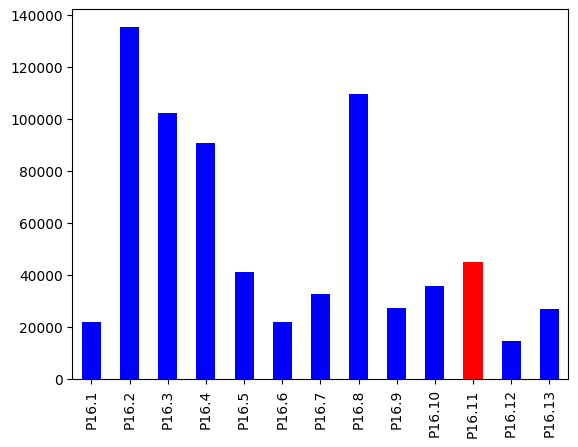

In [17]:
listaP16 =["P16.1","P16.2","P16.3","P16.4","P16.5","P16.6","P16.7",
           "P16.8","P16.9","P16.10","P16.11","P16.12","P16.13"]
preguntaP16 = ECN2022EXP[listaP16].sum()
preguntaP16.plot(kind="bar",color=['red' if i == 10 else 'blue' for i in range(len(preguntaP16))])

Aspecto del clima de negocxio afectados

<Axes: >

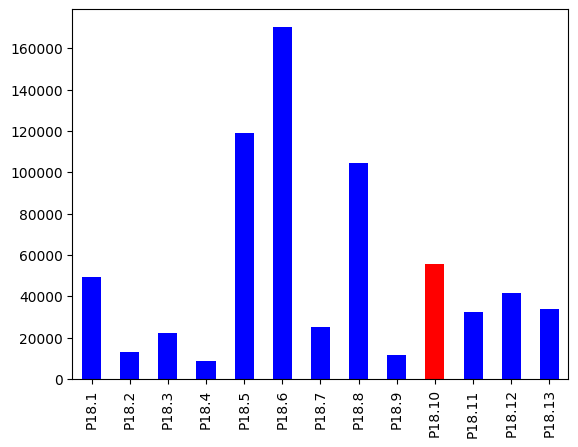

In [18]:
listaP18 = ["P18.1", "P18.2", "P18.3", "P18.4", "P18.5", "P18.6", "P18.7",
            "P18.8", "P18.9", "P18.10", "P18.11", "P18.12", "P18.13"]
preguntaP18 = ECN2022EXP[listaP18].sum()
preguntaP18.plot(kind="bar",color=['red' if i == 9 else 'blue' for i in range(len(preguntaP18))])

Análisis de sector

<Axes: >

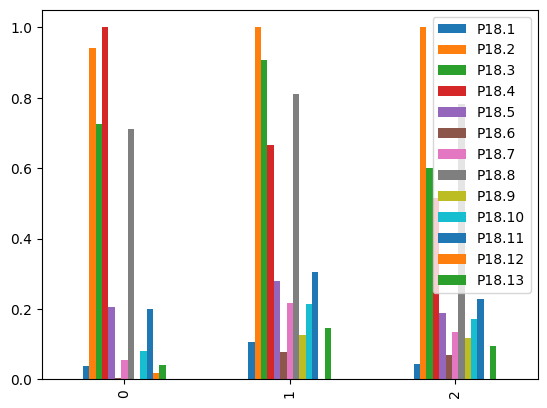

In [19]:
# Comparativa  factores de incertidumbre dividido por sectores
from sklearn.preprocessing import MinMaxScaler
sector = ECN2022EXP.groupby("F3").agg({"P16.1":"sum","P16.2":"sum","P16.3":"sum","P16.4":"sum",
"P16.5":"sum","P16.6":"sum","P16.7":"sum","P16.8":"sum",
"P16.9":"sum","P16.10":"sum","P16.11":"sum","P16.12":"sum","P16.13":"sum"})

#Se normaliza para comparar entre sectores
scaler = MinMaxScaler()
sector_normalizado = scaler.fit_transform(sector.transpose())
sector_normalizado = pd.DataFrame(sector_normalizado.transpose())
sector_normalizado.columns = listaP18 
sector_normalizado.plot(kind="bar")

<Axes: >

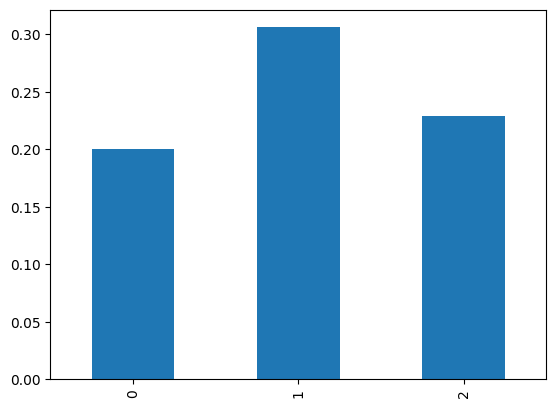

In [20]:
#Comparativa  factores de incertidumbre para el aspecto de seguridad en clima de negocios mas afectados
sector_normalizado["P18.11"].plot(kind="bar")

<Axes: >

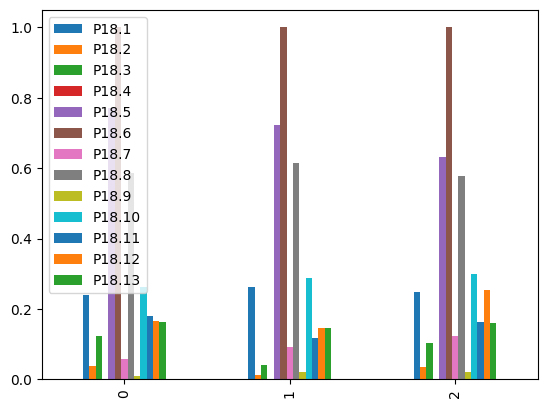

In [21]:
#Analisis de aspectos clima de negocios mas afectados dividido por sectores
sector = ECN2022EXP.groupby("F3").agg({"P18.1":"sum","P18.2":"sum","P18.3":"sum","P18.4":"sum",
                                       "P18.5":"sum","P18.6":"sum","P18.7":"sum","P18.8":"sum",
                                       "P18.9":"sum","P18.10":"sum","P18.11":"sum","P18.12":"sum","P18.13":"sum"})

#Se normaliza para comparar entre sectores
scaler = MinMaxScaler()
sector_normalizado = scaler.fit_transform(sector.transpose())
sector_normalizado = pd.DataFrame(sector_normalizado.transpose())
sector_normalizado.columns = listaP18 
sector_normalizado.plot(kind="bar")

<Axes: >

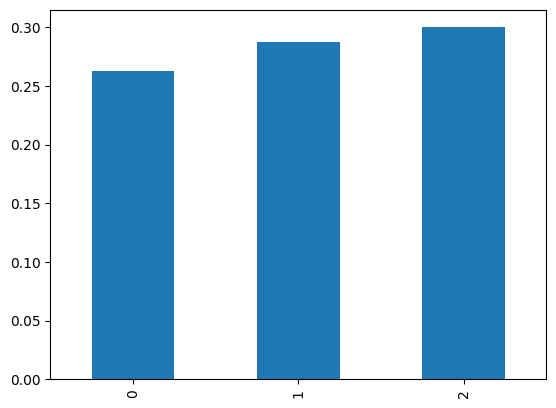

In [22]:
#Comparacion entre sectores para el aspecto de seguridad en clima de negocios mas afectados
sector_normalizado["P18.10"].plot(kind="bar")

comportamiento primer semestre 2022 vs segundo semetre 2021 para situación económica e inversión

In [44]:
comportamiento = ECN2022EXP[["F3","P13.1"]]

comportamiento_agrupado = comportamiento.groupby(["F3","P13.1"]).size()

comportamiento_df = comportamiento_agrupado.reset_index(name='count')

scaler = MinMaxScaler()

comportamiento_normal = scaler.fit_transform(comportamiento_df[['count']])

comportamiento_normal['count'] = comportamiento_normal

plt.bar(comportamiento_normal.index, comportamiento_df['count_normalized'], color='blue')

    F3  P13.1     count
0    1      1  0.150500
1    1      2  0.167059
2    1      3  0.253878
3    1      4  0.000000
4    2      1  0.346150
5    2      2  0.565522
6    2      3  0.686369
7    2      4  0.019040
8    3      1  0.724017
9    3      2  1.000000
10   3      3  0.911610
11   3      4  0.040960
